In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from cycler import cycler
plt.rcParams['axes.prop_cycle'] = cycler(color=sns.color_palette('colorblind'))
import pandas as pd



Bad key "text.kerning_factor" on line 4 in
/home/thijs/.conda/envs/py37/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution
/home/thijs/.conda/envs/py37/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
def f(n, rat):
    rec = np.sqrt(1 - np.sqrt(1 / (1 + n * rat ** 2)))
    return rec

In [5]:
len_arrs = 51
n_arr = np.logspace(0, 5, len_arrs)
rat_arr = np.logspace(-4, 1, len_arrs)

rec_mat = np.zeros((len(n_arr), len(rat_arr)))

In [6]:
len_mat = rec_mat.size
tmp_dict = {x: np.zeros(len_mat) for x in ['rat', 'n', 'rec']}
ii = 0
for i_n, n in enumerate(n_arr):
    for i_rat, rat in enumerate(rat_arr):
        rec_mat[i_n, i_rat] = f(n=n, rat=rat)
        tmp_dict['rec'][ii] = rec_mat[i_n, i_rat] 
        tmp_dict['rat'][ii] = rat
        tmp_dict['n'][ii] = n
tmp_df = pd.DataFrame(tmp_dict)

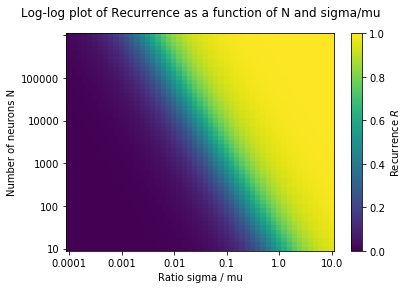

In [7]:
ax = plt.subplot(111)

im = ax.imshow(rec_mat, origin='top',
          aspect='auto', vmin=0, vmax=1)
tick_arr = np.arange(6) * 10
# ax.vlines(x=10, ymin=0, ymax=len_arrs - 1)
ax.set_xticks(tick_arr)
ax.set_xticklabels(np.round(np.array([rat_arr[x] for x in tick_arr]), 4))
ax.set_yticklabels(np.array([int(n_arr[x]) for x in tick_arr]));
ax.set_xlabel('Ratio sigma / mu')
ax.set_ylabel('Number of neurons N')
ax.set_title('Log-log plot of Recurrence as a function of N and sigma/mu', y=1.05)
plt.colorbar(im, label='Recurrence ' + r"$R$");


In [8]:
f(n=10, rat=0.1)

0.21572531319807522

Text(0.5, 1.0, 'Recurrence as a function of sigma/mu, dependent on N')

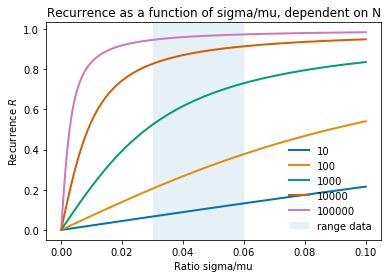

In [9]:
sub_rat_arr = np.logspace(-4, -1, 101)
sub_n_arr = np.logspace(1, 5, 5)

ax = plt.subplot(111)
for i_n, n in enumerate(sub_n_arr):
    f_arr = np.array([f(n=n, rat=rat) for rat in sub_rat_arr])
    ax.plot(sub_rat_arr, f_arr, label=int(n), linewidth=2)
ax.axvspan(xmin=0.03, xmax=0.06, alpha=0.1, label='range data')
ax.legend(frameon=False, loc='lower right')
ax.set_xlabel('Ratio sigma/mu')
ax.set_ylabel('Recurrence ' + r"$R$")
ax.set_title('Recurrence as a function of sigma/mu, dependent on N')